# House Price Prediction Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# read the training data and testing data
train = pd.read_csv("/content/drive/MyDrive/Tech IS/Kaggle Challenge/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Tech IS/Kaggle Challenge/test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
corr = train.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [ ]:
corr = corr['SalePrice'][:-1]
corr[abs(corr)>=0.05].sort_values(ascending=False)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [ ]:
# These are the features that can affect the price
Features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
               'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1',
               'LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath', 'BsmtUnfSF',
               'BedroomAbvGr', 'ScreenPorch', 'PoolArea']
Target = "SalePrice"

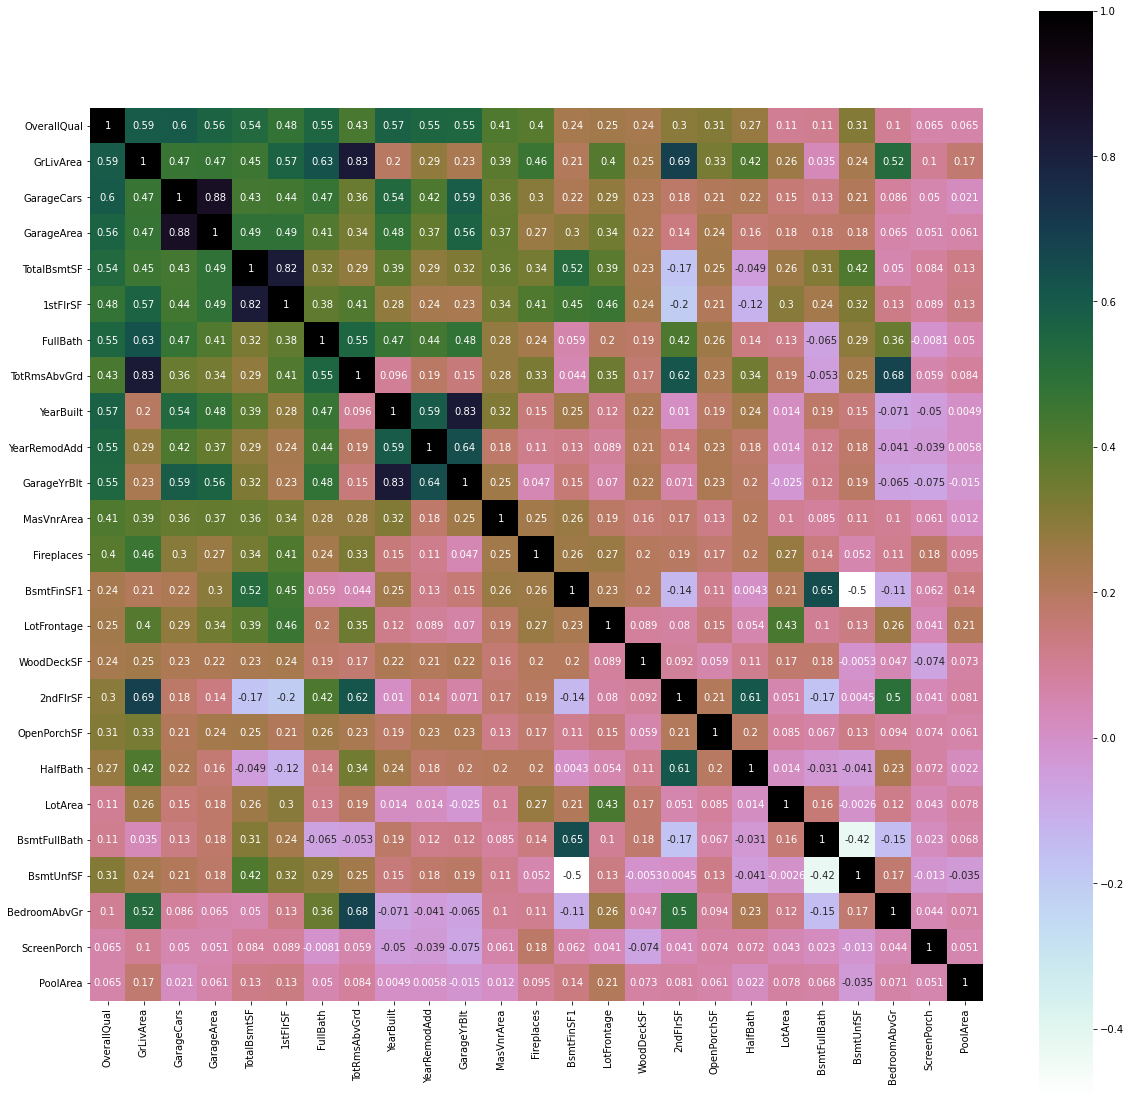

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(train[Features].corr(), annot = True, cmap = 'cubehelix_r', square = True)
plt.show()

In [ ]:
train[Features].shape

(1460, 25)

In [ ]:
test[Features].shape

(1459, 25)

In [ ]:
train_c = train.select_dtypes(include='object')
train_c  = train_c.columns
train_la = train[train_c]
train_la.shape

(1460, 43)

In [ ]:
test_c = train.select_dtypes(include='object')
test_c = test_c.columns
test_la = test[test_c]
test_la.shape

(1459, 43)

In [ ]:
train[train_c].head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
for col in train[train_c].columns:
  print(col, ":", len(train[col].unique()),"Labels")

MSZoning : 5 Labels
Street : 2 Labels
Alley : 3 Labels
LotShape : 4 Labels
LandContour : 4 Labels
Utilities : 2 Labels
LotConfig : 5 Labels
LandSlope : 3 Labels
Neighborhood : 25 Labels
Condition1 : 9 Labels
Condition2 : 8 Labels
BldgType : 5 Labels
HouseStyle : 8 Labels
RoofStyle : 6 Labels
RoofMatl : 8 Labels
Exterior1st : 15 Labels
Exterior2nd : 16 Labels
MasVnrType : 5 Labels
ExterQual : 4 Labels
ExterCond : 5 Labels
Foundation : 6 Labels
BsmtQual : 5 Labels
BsmtCond : 5 Labels
BsmtExposure : 5 Labels
BsmtFinType1 : 7 Labels
BsmtFinType2 : 7 Labels
Heating : 6 Labels
HeatingQC : 5 Labels
CentralAir : 2 Labels
Electrical : 6 Labels
KitchenQual : 4 Labels
Functional : 7 Labels
FireplaceQu : 6 Labels
GarageType : 7 Labels
GarageFinish : 4 Labels
GarageQual : 6 Labels
GarageCond : 6 Labels
PavedDrive : 3 Labels
PoolQC : 4 Labels
Fence : 5 Labels
MiscFeature : 5 Labels
SaleType : 9 Labels
SaleCondition : 6 Labels


In [ ]:
label_null = train[train_c].isnull().sum()
label_null = label_null[label_null>1000]
label_null

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [ ]:
drop_list = ['Alley','PoolQC','Fence','MiscFeature']
train_la = train_la.drop(drop_list, axis = 1)
test_la = test_la.drop(drop_list, axis = 1)
print(train_la.shape)
print(test_la.shape)

(1460, 39)
(1459, 39)


In [ ]:
train_c = train_la.columns
test_c = test_la.columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
# Here I am imputing all the missing values in the categorical columns
train[train_c] = imputer.fit_transform(train[train_c])
test[test_c] = imputer.fit_transform(test[test_c])

In [ ]:
# Here we are checking to see if all the null values were dropped in the categorical columns
print(train[train_c].isnull().sum())
print(test[test_c].isnull().sum())

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0

In [ ]:
train[train_c].head(1)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
# creating dummies
train_labels = pd.get_dummies(train[train_c], drop_first=True)
test_labels = pd.get_dummies(test[test_c], drop_first=True)
print(train_labels.head(2))
print(test_labels.head(2))
print(train_labels.shape)
print(test_labels.shape)

   MSZoning_FV  MSZoning_RH  ...  SaleCondition_Normal  SaleCondition_Partial
0            0            0  ...                     1                      0
1            0            0  ...                     1                      0

[2 rows x 200 columns]
   MSZoning_FV  MSZoning_RH  ...  SaleCondition_Normal  SaleCondition_Partial
0            0            1  ...                     1                      0
1            0            0  ...                     1                      0

[2 rows x 184 columns]
(1460, 200)
(1459, 184)


In [ ]:
# using the test.columns to get all the encoded features
label_features = list(test_labels.columns)
label_features[:2]

['MSZoning_FV', 'MSZoning_RH']

In [ ]:
# checking to see if it works with training label features
train_labels[label_features].head(2)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,...,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
print(train[Features].shape)
print(test[Features].shape)
print(train_labels[label_features].shape)
print(test_labels[label_features].shape)

(1460, 25)
(1459, 25)
(1460, 184)
(1459, 184)


In [ ]:
train_df = pd.concat([train[Features],train_labels[label_features]], axis=1)
test_df = pd.concat([test[Features],test_labels[label_features]], axis=1)
print(train_df.shape)
print(test_df.shape)

(1460, 209)
(1459, 209)


In [ ]:
null = train[Features].isnull().sum()
null[null>0].sort_values()

MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

In [ ]:
train[Features].head(2)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea
0,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706,65.0,0,854,61,1,8450,1,150,3,0,0
1,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978,80.0,298,0,0,0,9600,0,284,3,0,0


In [ ]:
train[Target].head(2)

0    208500
1    181500
Name: SalePrice, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_df, train[Target], test_size=0.3, random_state = 42, )
print('The training and testing feature: ', X_train.shape, y_train.shape)
print('The training and testing target: ', X_val.shape, y_val.shape)

The training and testing feature:  (1022, 209) (1022,)
The training and testing target:  (438, 209) (438,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
model = LinearRegression()
imputer = SimpleImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print("VAL SCORE:",pipe.score(X_val, y_val))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_val, pred))
rmse = np.sqrt(MSE(y_val, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: -6555544054858169.0
Training SCORE: 0.9036062996771523
MSE :  45745201068768565626142720.000000
RMSE :  6763519872726.667969


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
model = LinearRegression(fit_intercept=False)
imputer = IterativeImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print("VAL SCORE:",pipe.score(X_val, y_val))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_val, pred))
rmse = np.sqrt(MSE(y_val, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: -1.235053865062895e+21
Training SCORE: -4.593653427209676
MSE :  8618321670219362240849770446848.000000
RMSE :  2935697816570936.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = MinMaxScaler()
model = LinearRegression()
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print("VAL SCORE:",pipe.score(X_val, y_val))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_val, pred))
rmse = np.sqrt(MSE(y_val, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: -3.3644086135757103e+19
Training SCORE: 0.9035228418691059
MSE :  234771587556431243591699922944.000000
RMSE :  484532339020246.687500


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
model = LinearRegression()
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print("VAL SCORE:",pipe.score(X_val, y_val))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_val, pred))
rmse = np.sqrt(MSE(y_val, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: -4.699114436404294e+20
Training SCORE: 0.9034025531334745
MSE :  3279086113061262720495920349184.000000
RMSE :  1810824705227224.000000


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
model = Ridge()
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print("VAL SCORE:",pipe.score(X_val, y_val))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_val, pred))
rmse = np.sqrt(MSE(y_val, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: 0.866231799389925
Training SCORE: 0.9034873004178386
MSE :  933447046.089242
RMSE :  30552.365638


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
model = Lasso(max_iter=1000000000)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print("VAL SCORE:",pipe.score(X_val, y_val))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_val, pred))
rmse = np.sqrt(MSE(y_val, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: 0.8655019379610878
Training SCORE: 0.9035222200222632
MSE :  938540087.572161
RMSE :  30635.601636


In [ ]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
xgb_model = XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [.02,.03, 0.05, .07, .1,.2,.3,.4,.5], #so called `eta` value
              'max_depth': [2,3, 5, 6, 7],
              'min_child_weight': [1,2,3,4,5,6],
              'silent': [1],
              'subsample': [0.7,.1,.2,.3,.6,.7],
              'colsample_bytree': [0.7,.1,.2,.3],
              'n_estimators': [10,20,30,40,50,60,70,80,90,100]}

search = RandomizedSearchCV(xgb_model, param_distributions=parameters, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                        'learning_rate': [0.02, 0.03, 0.05,
                                                          0.07, 0.1, 0.2, 0.3,
                                 

In [ ]:
print(search.best_score_)
print(search.best_params_)

0.8709374500443262
{'subsample': 0.6, 'silent': 1, 'objective': 'reg:squarederror', 'nthread': 4, 'n_estimators': 100, 'min_child_weight': 6, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.2}


In [ ]:
import xgboost
from xgboost import XGBRegressor
# from sklearn.ensemble import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as MSE
scaler = MinMaxScaler()
model = XGBRegressor(objective ='reg:squarederror',
                     n_estimators = 42,
                   learning_rate = 0.2,
                   max_depth = 5,
                   subsample =  .6)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print("VAL SCORE:",pipe.score(X_val, y_val))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_val, pred))
rmse = np.sqrt(MSE(y_val, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: 0.9228474403339799
Training SCORE: 0.9792972476108304
MSE :  538377795.245952
RMSE :  23202.969535


In [ ]:
import xgboost
from xgboost import XGBRegressor
# from sklearn.ensemble import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = MinMaxScaler()
model = XGBRegressor(objective ='reg:squarederror',
                     subsample =  0.3,
                     silent = 1, nthread = 4, n_estimators = 80, min_child_weight =  2, max_depth = 3, learning_rate = 0.07, colsample_bytree = 0.3)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print("VAL SCORE:",pipe.score(X_val, y_val))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_val, pred))
rmse = np.sqrt(MSE(y_val, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: 0.9036814106030995
Training SCORE: 0.921187600944748
MSE :  672120147.732985
RMSE :  25925.280090


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = MinMaxScaler()
model = BaggingRegressor(n_estimators = 42)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print("VAL SCORE:",pipe.score(X_val, y_val))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_val, pred))
rmse = np.sqrt(MSE(y_val, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: 0.887540315254646
Training SCORE: 0.9769063368740656
MSE :  784754224.478756
RMSE :  28013.465057


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = MinMaxScaler()
model = BaggingRegressor(base_estimator=None, 
                         bootstrap=True, 
                         bootstrap_features=False,
                         max_features=1.0, 
                         max_samples=1.0, 
                         n_estimators=1500)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print("VAL SCORE:",pipe.score(X_val, y_val))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_val, pred))
rmse = np.sqrt(MSE(y_val, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: 0.8950022323957283
Training SCORE: 0.9766105817956259
MSE :  732684267.031924
RMSE :  27068.141182


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = MinMaxScaler()
model = RandomForestRegressor(n_estimators=40)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_val)
print("VAL SCORE:",pipe.score(X_val, y_val))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_val, pred))
rmse = np.sqrt(MSE(y_val, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: 0.8891324339367241
Training SCORE: 0.9738725107076165
MSE :  773644271.036671
RMSE :  27814.461545


### Now that I have a model in Mind We can submit

In [ ]:
import xgboost
from xgboost import XGBRegressor
# from sklearn.ensemble import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = MinMaxScaler()
model = XGBRegressor(objective ='reg:squarederror',
                     n_estimators = 42,
                   learning_rate = 0.2,
                   max_depth = 5,
                   subsample =  .6)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)

print("Training SCORE:",pipe.score(X_train, y_train))

# Here we are fitting the test 

predicted = pipe.predict(test_df)

Training SCORE: 0.9792972476108304


In [ ]:
dd = pd.read_csv('/content/drive/MyDrive/Tech IS/Kaggle Challenge/sample_submission.csv')
print(dd.head())
dd.shape

     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977


(1459, 2)

In [ ]:
predicted_data = {"Id":test.Id,
                  "SalePrice":predicted}
submission_data = pd.DataFrame(predicted_data)
submission_data.shape

(1459, 2)

In [ ]:
submission_data.head()

,Id,SalePrice
0,1461,121355.960938
1,1462,160740.593750
2,1463,182162.750000
3,1464,191560.140625
4,1465,199539.062500


In [ ]:
from google.colab import files
submission_data.to_csv("SalePrice_Prediction.csv", index=False)
files.download("SalePrice_Prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>